# NNGen Demo — Gemini 2.5 Flash Image

Interactive demo to generate a neural network diagram from a natural language prompt.
- Uses the multi-agent pipeline (`parser → planner → prompt-gen → G1 → G2 → judge → select → edit loop → archive`).
- All model calls go through `app.llm.gemini.call_gemini`. If `GEMINI_API_KEY` is not set, the pipeline falls back to local placeholders so the demo still runs.
- For image generation/editing, set `GEMINI_IMAGE_MODEL`/`GEMINI_IMAGE_EDIT_MODEL` (e.g., `gemini-2.5-flash-image` or `gemini-2.5-flash-image-preview`).


In [1]:
# Imports
from app.graph import run_pipeline
from app.state import AppState
from pathlib import Path
from IPython.display import Image, display
import os, json


In [2]:
# Optional: configure models here if not set in environment (.env is supported).
# os.environ.setdefault("GEMINI_MODEL", "gemini-2.5-flash")
# os.environ.setdefault("GEMINI_IMAGE_MODEL", "gemini-2.5-flash-image")
# os.environ.setdefault("GEMINI_IMAGE_EDIT_MODEL", "gemini-2.5-flash-image")
print("GEMINI_MODEL=", os.getenv("GEMINI_MODEL", "(default)"))
print("GEMINI_IMAGE_MODEL=", os.getenv("GEMINI_IMAGE_MODEL", "(default)"))
print("GEMINI_IMAGE_EDIT_MODEL=", os.getenv("GEMINI_IMAGE_EDIT_MODEL", "(default)"))


GEMINI_MODEL= gemini-2.5-flash
GEMINI_IMAGE_MODEL= gemini-2.5-flash-image-preview
GEMINI_IMAGE_EDIT_MODEL= gemini-2.5-flash-image-preview


In [3]:
# Enter a natural language NN spec (leave blank to use the sample in spec/vit.txt).
print("Enter your NN spec prompt (blank for sample):")
user_text = input().strip()
if not user_text:
    user_text = Path('spec/vit.txt').read_text()

# Number of candidates (K) and max edit rounds (T)
K = 4
T = 1
print(f"Configured: K={K}, T={T}")


Enter your NN spec prompt (blank for sample):


 Generate a high-level diagram of a Vision Transformer (ViT): - Input: 224×224 RGB image - Patch Embedding: split into 16×16 patches and apply a linear projection - Add CLS token and positional encoding - Transformer Encoder stack: Multi-Head Self-Attention + MLP + residual + LayerNorm (repeat L layers) - Classification head: take CLS token for linear classification Layout requirements: left-to-right flow; clear arrow directions; correct spelling of all labels; show the number of layers L; keep colors readable.


Configured: K=4, T=1


In [4]:
# Run the multi-agent pipeline
state: AppState = {
    'K': K,
    'T': T,
    'user_text': user_text,
    'outdir': ''  # use timestamped default
}
final_state = run_pipeline(state)
print('Artifacts directory:', final_state['outdir'])


Artifacts directory: artifacts\run_20250907_070203


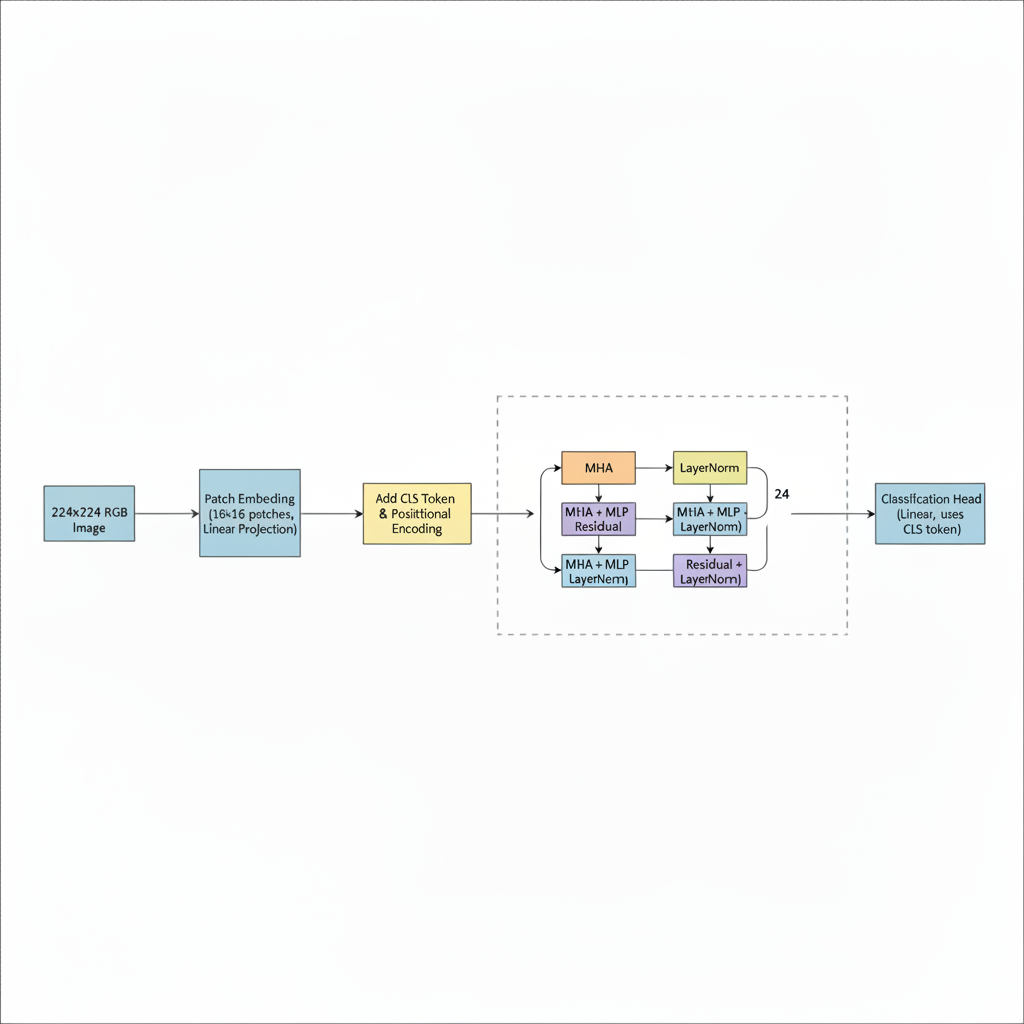

In [5]:
# Display the final image
final_path = Path(final_state['outdir']) / 'final.png'
if final_path.exists():
    display(Image(filename=str(final_path)))
else:
    print('final.png not found at', final_path)


In [6]:
# (Optional) Inspect outputs: spec and scoring
spec_txt = Path(final_state['outdir']) / 'spec.txt'
scores_json = Path(final_state['outdir']) / 'scores.json'
if spec_txt.exists():
    print('--- spec.txt ---')
    print(spec_txt.read_text())
if scores_json.exists():
    print('--- scores.json ---')
    print(scores_json.read_text())


--- spec.txt ---
```
[Input: 224x224 RGB Image]
  -> [Patch Embedding (16x16 patches, Linear Projection)]
  -> [Add CLS Token & Positional Encoding]
  -> [Transformer Encoder (L Layers: MHA + MLP + Residual + LayerNorm)]
  -> [Classification Head (Linear, uses CLS token)]

**Fillable Details:**
*   **L**: <number of Transformer Encoder layers>
```
--- scores.json ---
[
  {
    "image_path": "artifacts\\run_20250907_070203\\edited_round_1.png",
    "score": 0.5,
    "violations": [
      "Content correctness: The internal structure of the 'Transformer Encoder' block (within the dashed box) is conceptually incorrect for a standard Transformer architecture. The arrangement of MHA, MLP, Residual connections, and LayerNorm components does not accurately reflect the typical data flow and configuration.",
      "Labels: Spelling error 'LayerNemj' should be 'LayerNorm'.",
      "Labels: Spelling error 'MtIA' should be 'MHA'.",
      "Minimal color: Used 5 distinct accent colors (light blue, ye